# Part II - (Visualization Analysis of GoFord Bike system [February 2019])
## by (Olamilekan Olugbayila)


## Investigation Overview


> The investigative focus is on the different customer behaviour and usage patterns. The goal is to identify demand pattern among the system users.



## Dataset Overview

> Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Like other bike share programs, Ford GoBike uses a fleet of sturdy, durable bikes that are locked into a system of docking stations spread out over the city.

> The bikes are perfect for one-way travels because they may be unlocked from one station and returned to any other station in the network. The bikes can be used 365 days a year, seven days a week, and 24 hours a day. Riders who sign up as members or buy passes get access to all the bikes in the network.

> Preliminary Wrangling of the data set involved a cleaning up the datatype format of some of the columns and also removal of columns that were deemed unnecessary. This analysis only explored Ford GoBike's trip data for public containing rides recorded in Feb 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
base_color = sns.color_palette()[0]
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('fordgobike_cleaned_dataset.csv')
df_clean.head(3)

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,member_age,start_month_name,weekday,start_time_hour,end_time_hour
0,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,869,35,February,Thu,17,8
1,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,1030,47,February,Thu,12,5
2,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,608,30,February,Thu,17,4


In [3]:
# First create datframe to isolate the different customer types

customer_df = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber_df = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

#Calculate proportion of customer types to overall bike recorded in system
customer_prop = customer_df / df_clean['bike_id'].count()
subscriber_prop = subscriber_df / df_clean['bike_id'].count()

## (Visualization 1)

### Key Insight 1: The ratio of subscribers to regular customers in the system.

> Customer types are divided into subscribing members and regular/guest customers

> More than 90% of the bike system users subscribe to the service! compared to less than 10% for regular guest customers

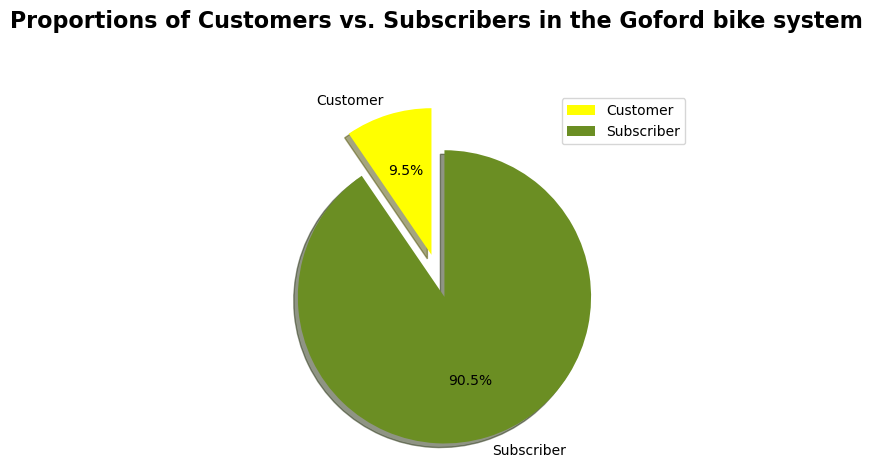

In [4]:
# Piechart employed to visualize the proportion

labels = ['Customer', 'Subscriber']
sizes = [customer_prop, subscriber_prop]
colors = [ 'yellow', 'olivedrab',]
explode = (0, 0.3)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.legend()
plt.suptitle('Proportions of Customers vs. Subscribers in the Goford bike system', 
             y=1.05, fontsize=16, fontweight='bold')

plt.show()

## (Visualization 2)

### Key Insight 2: Use of the bikesystem by different genders with a focus on the weekly usage

> Males dominate the usage of the bikes
> For both customer types, peak demand for bike rides is on Thursdays
> Significant drop in demand for bike rides in the subscriber category on weekends compared to regular/guest customers

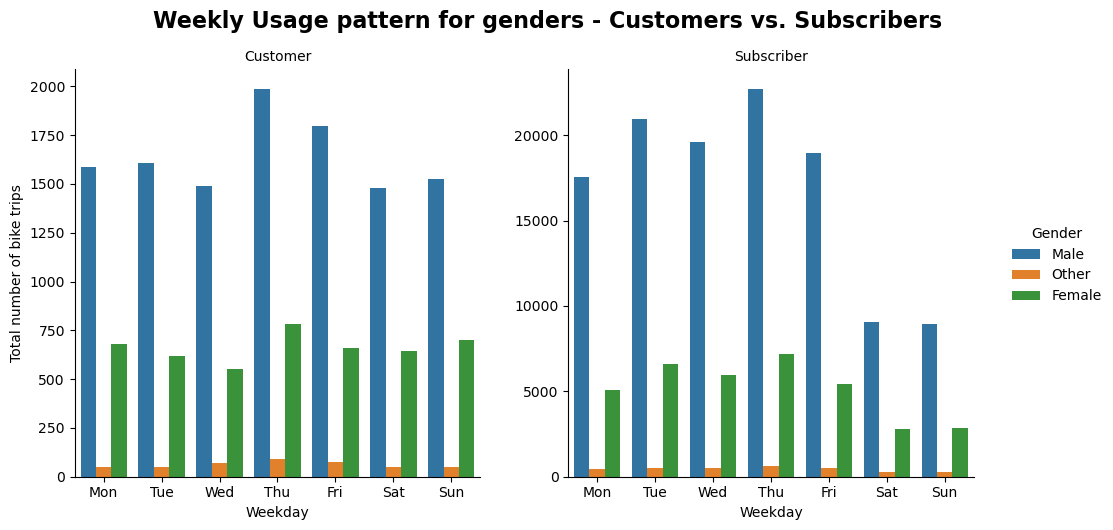

In [5]:
# Employing count plot in seaborn to visualize pattern for weekly usage

list_weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
gender_weekly_plot = sns.catplot(data=df_clean, x='weekday', col='user_type',
                hue='member_gender', order = list_weekday, sharey=False, kind='count')

gender_weekly_plot.set_axis_labels('Weekday','Total number of bike trips')
gender_weekly_plot.set_titles("{col_name}")
gender_weekly_plot._legend.set_title('Gender')

plt.suptitle('Weekly Usage pattern for genders - Customers vs. Subscribers', 
             y=1.05, fontsize=16, fontweight='bold')
plt.show()

## (Visualization 3)

### Key Insight 3: Bike ride duration among the customer types

> Generally, customers ride for the longest times

> In both customer types, the plot show that females take the longer trips. 

> In both cases, the males have the highest frequency of rides; with the high density of rides in duration at around (5 - 10 mins)

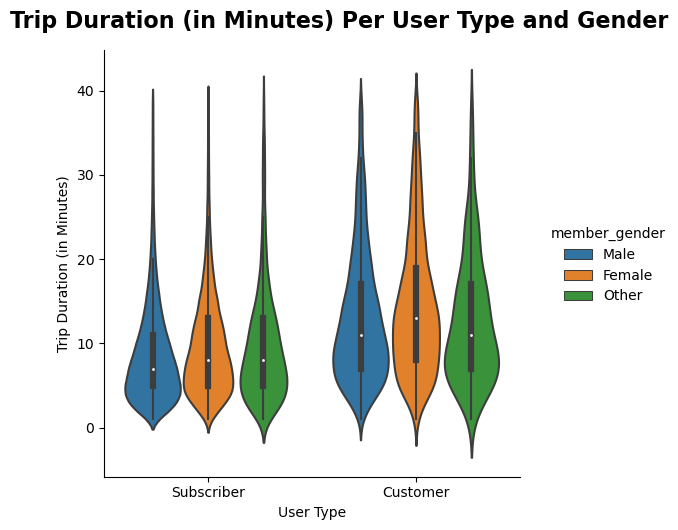

In [6]:
# Using a violin plot to visualize statistical summary data for the 3 variables to be analysed
#For rides below (40 minutes)

duration_data = df_clean.query('duration_min < 40')
gender_bike_length = sns.catplot(data=duration_data, x='user_type', y="duration_min", 
                                 hue="member_gender", kind="violin");

gender_bike_length.set_axis_labels("User Type", "Trip Duration (in Minutes)")

gender_bike_length.fig.suptitle('Trip Duration (in Minutes) Per User Type and Gender', 
                                y=1.05, fontsize=16, fontweight='bold')
plt.show()

## (Visualization 4)

### Key Insight 4: Hourly usage patterns among the customer types in weekdays

> Mornings and Evenings hours see the highest demand for bike rides among both customer groups

> Heat map plot confirms the discrepancy of bike rides on weekends for both customer groups. (More activity on the weekend for the customers compared to less for the subscribers)

> The heatmap plotted gives an overall and summarized look at the trend for usage behaviour across both user categories

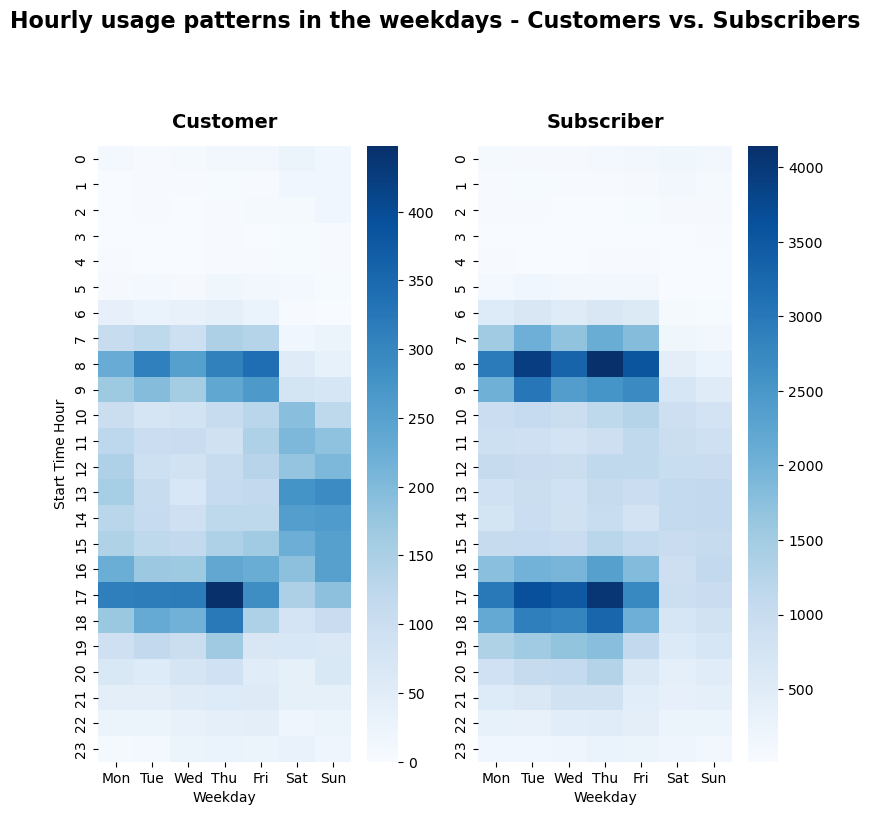

In [7]:
# Employing heatmaps to visualize the hourly usage patterns

# First set the order for weekday using .categorical function
df_clean['weekday'] =  pd.Categorical(df_clean['weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage patterns in the weekdays - Customers vs. Subscribers', 
             y=1.05, fontsize=16, fontweight='bold');


#Now divide the heatmap plots using subplots for customer and subscriber segments

plt.subplot(1,2,1)

#create dataframe to isolate customer data for weekday, start time and number of bike trips
customer_df = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "weekday"])["bike_id"].size().reset_index()

#using .pivot function to reshape above dataframe in order by column values specified
customer_df = customer_df.pivot('start_time_hour','weekday','bike_id')

#Make heat map plot for customer
sns.heatmap(customer_df, cmap= 'Blues')
plt.title("Customer", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')


#Make heat map plot for Subscribers

plt.subplot(1,2,2)

#create dataframe to isolate subscriber data for weekday, start time and number of bike trips
subscriber_df = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "weekday"])["bike_id"].size().reset_index()
subscriber_df = subscriber_df.pivot('start_time_hour','weekday','bike_id')
sns.heatmap(subscriber_df, cmap= 'Blues')
plt.title("Subscriber", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('')

plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Slide_Deck.ipynb to slides
[NbConvertApp] Writing 840617 bytes to Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Slide_Deck.slides.html
Use Control-C to stop this server
